Runtime Analysis - data analysis

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

clean_df = pd.read_csv(r"clean_df.csv")
clean_df.head()

,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime
0,1,Inception,2010,8.8,87%,1,0,0,0,148.0
1,2,The Matrix,1999,8.7,87%,1,0,0,0,136.0
2,3,Avengers: Infinity War,2018,8.5,84%,1,0,0,0,149.0
3,4,Back to the Future,1985,8.5,96%,1,0,0,0,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,97%,1,0,1,0,161.0


#We recommend focusing your analysis on techniques such as aggregation, correlation, comparison, summary statistics, sentiment analysis, and time series analysis.

In [2]:
#Sort by runtime in descending order
sorted_df = clean_df.sort_values(by="Runtime", ascending=False)
# sorted_df
sorted_index_df = sorted_df.reset_index(drop=True)

print(sorted_index_df["Runtime"].max())
print(sorted_index_df["Runtime"].min())
sorted_index_df.head()

270.0
7.0


,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime
0,6246,Gone,2012,5.9,10%,0,0,1,0,270.0
1,3862,Dina,2017,6.8,98%,0,1,0,0,265.0
2,5674,The Greatest Story Ever Told,1965,6.6,41%,0,0,1,0,260.0
3,4663,Tom Petty and the Heartbreakers: Runnin' Down ...,2007,8.6,100%,0,0,1,0,239.0
4,7621,Golden Years,2016,6.1,29%,0,0,1,0,232.0


In [3]:
#Convert Rotten Tomatoes dtype from object to float

sorted_index_df['Rotten Tomatoes'].dtype
sorted_index_df['Rotten Tomatoes']=sorted_index_df['Rotten Tomatoes'].apply(lambda x: x.strip('%')).astype(float)

sorted_index_df.head()


,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime
0,6246,Gone,2012,5.9,10.0,0,0,1,0,270.0
1,3862,Dina,2017,6.8,98.0,0,1,0,0,265.0
2,5674,The Greatest Story Ever Told,1965,6.6,41.0,0,0,1,0,260.0
3,4663,Tom Petty and the Heartbreakers: Runnin' Down ...,2007,8.6,100.0,0,0,1,0,239.0
4,7621,Golden Years,2016,6.1,29.0,0,0,1,0,232.0


In [7]:
#Academy of Motion Picture Arts and Sciences classification:
#Short film - an original motion picture that has a running time of 40 minutes or less, including all credits
#Feature film - runs for more than 40 minutes

#Create two bins
bins = [0, 40, 300]
group_names = ["Short Film", "Feature Film"]

bin_df = sorted_index_df.copy()
bin_df.head()
bin_df["Category"]=pd.cut(bin_df["Runtime"], bins, labels=group_names, include_lowest=True)

#Group by category (Short film & Feature film)
category_df=bin_df.groupby("Category")
category_df[["IMDb", "Rotten Tomatoes"]].mean()


,IMDb,Rotten Tomatoes
Category,,
Short Film,6.414286,72.607143
Feature Film,6.374882,65.313586


In [5]:
summary1_df=category_df[["Netflix","Hulu","Prime Video","Disney+"]].sum() #,"Hulu","Prime Video","Disney+"]].apply(pd.Series.value_counts)
summary1_df

,Netflix,Hulu,Prime Video,Disney+
Category,,,,
Short Film,17,7,30,5
Feature Film,1405,626,3015,340


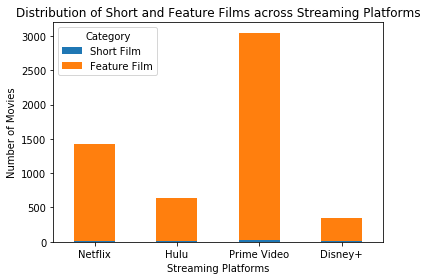

In [33]:
#Transpose column names and rows
summary1_transposed_df=summary1_df.T
summary1_transposed_df

#Plot a bar chart
summary1_chart=summary1_transposed_df.plot(kind='bar', stacked=True)
plt.xticks(rotation="horizontal")
plt.xlabel("Streaming Platforms")
plt.ylabel("Number of Movies")
plt.title("Distribution of Short and Feature Films across Streaming Platforms")
# Adding values to bars
#totals=[]
# for i in 

plt.tight_layout()
plt.savefig('Images/Short&FeatureStreamPlatforms.png')
plt.show()

In [32]:
#Short film df
bin_df.head()
shortfilm_df=bin_df.loc[bin_df["Category"]=="Short Film"]
shortfilm_df.head()

,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime,Category
5064,5952,Mystic India,2005,7.7,86.0,0,0,1,0,40.0,Short Film
5065,16600,Sacred Planet,2004,6.1,58.0,0,0,0,1,40.0,Short Film
5066,7261,Kilimanjaro - To the Roof of Africa,2002,6.7,90.0,0,0,1,0,40.0,Short Film
5067,16453,Roving Mars,2006,7.2,70.0,0,0,0,1,40.0,Short Film
5068,7563,Vikings: Journey to New Worlds,2004,6.8,100.0,0,0,1,0,40.0,Short Film


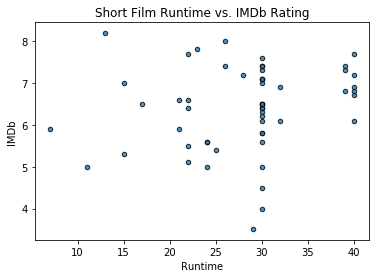

In [35]:
shortfilm_df.plot.scatter(x="Runtime", 
                          y="IMDb", edgecolors="black",
                          facecolors='lightblue', alpha=0.8)
plt.title("Short Film Runtime vs. IMDb Rating")

#plot_linear_regression(x,y, 'IMDb')
plt.tight_layout
plt.savefig("Images/ShortFilmRuntimeVSIMDb.png")
plt.show()


In [ ]:
#Short Film Runtime vs Rotten Tomatoes Rating

In [ ]:
# Add age group to csv and correlate Short/Feature Film with Age group

In [ ]:
#Bin based on <1 hour; 1-1.5 hrs; 1.5-2hrs, 2+? *DISCUSS* 